In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
data.drop(['Id'],axis=1,inplace=True)

In [7]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
#select features for clustering
data_for_clustering=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
#choose the no of clusters(k)
k=3

In [10]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=k,random_state=0)
kmeans.fit(data_for_clustering)

KMeans(n_clusters=3, random_state=0)

In [12]:
#add cluster label for data frame
data['Cluster']=kmeans.labels_
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


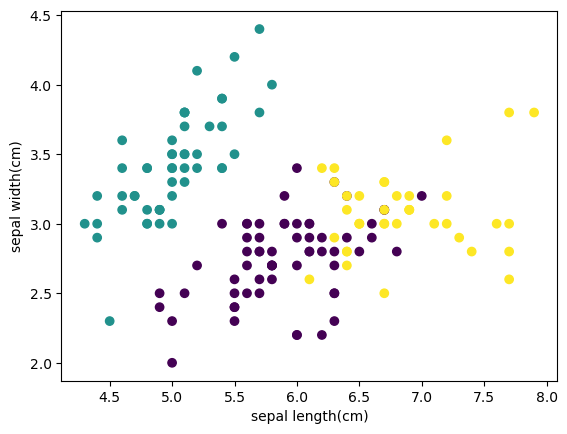

In [15]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],c=data['Cluster'],cmap='viridis')
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.show()

Text(0, 0.5, 'petal width(cm)')

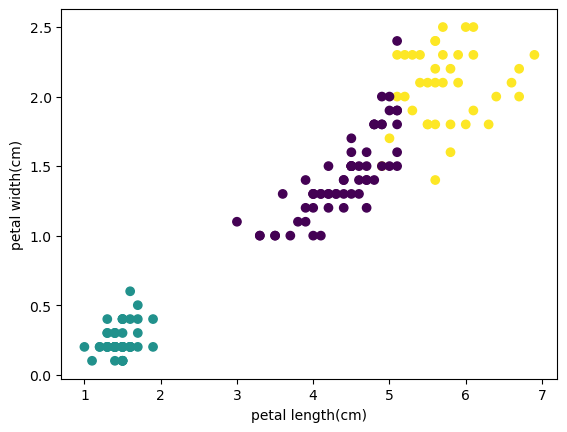

In [16]:
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],c=data['Cluster'],cmap='viridis')
plt.xlabel('petal length(cm)')
plt.ylabel('petal width(cm)')

In [22]:
#print cluster centers
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=data_for_clustering.columns)
print("Cluster centers:")
print(cluster_centers)

Cluster centers:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       5.901613      2.748387       4.393548      1.433871
1       5.006000      3.418000       1.464000      0.244000
2       6.850000      3.073684       5.742105      2.071053


In [24]:
#plot the elbow method for determining the number of clusters
import numpy as np
wss_list=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data_for_clustering)
    wss=sum(np.min(kmeans.transform(data_for_clustering),axis=1)**2)
    wss_list.append(wss)
wss_list

[680.8243999999994,
 152.36870647733878,
 78.94084142614605,
 57.317873214286216,
 46.53558205128307,
 38.9309630496726,
 34.31116758986898,
 30.374975441225196,
 28.090578814460976,
 26.302502603433865]

Text(0, 0.5, 'WSS')

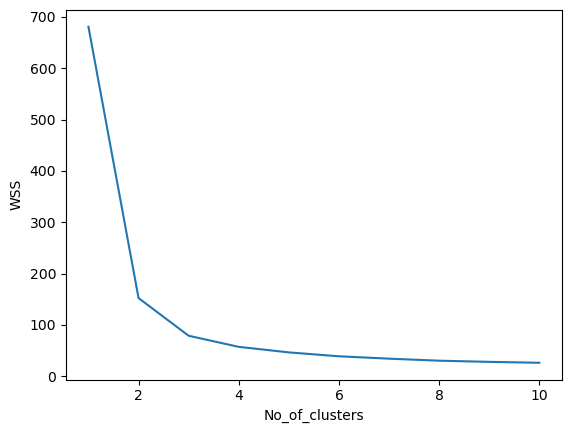

In [25]:
plt.plot(range(1,11),wss_list)
plt.xlabel('No_of_clusters')
plt.ylabel('WSS')